# **Neural network part of Qimpact project**
**Data was proceeded and prepared for NN in Qimpact.jpynb, here's the implementation of NN itself**

In [60]:
import torch
import torch.optim as optim
import torch.nn as nn
from torch.utils.data import Dataset, TensorDataset, DataLoader
import pytorch_lightning as pl
from pytorch_lightning import Trainer
from pytorch_lightning.profiler import Profiler, AdvancedProfiler
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl
from PIL import Image
%matplotlib ipympl

#!!!
import scienceplots
path='C:/Users/aleks/Projects/arameic-mishmash/Bachelor/Data'
plt.style.use('science')
#!!!

**Size of test and validation data (Rest will be used for training)**

In [38]:
validationsize=1000 #how many samples will be used as traindata
testsize=1000

**Importing already scaled data, that were created in Qimpact.jupynb**

In [39]:
scaled_Qdata = pd.read_csv(f'{path}/scaled_QData_gradT.csv', header=0, index_col=0)  #qdata
print(scaled_Qdata.shape)
scaled_Qdata.head()

(9731, 1353)


,Z_0,Z_1,Z_2,Z_3,Z_4,Z_5,Z_6,Z_7,Z_8,Z_9,...,n_263,n_264,n_265,n_266,n_267,n_268,n_269,Qimpact_c-1,Qimpact_c,Qimpact_c+1
0.003694,-0.390936,-0.390936,-0.390936,-0.390936,-0.390936,-0.390936,-0.390936,-0.390936,-0.390936,-0.390936,...,-0.387512,-0.387510,-0.387508,-0.387506,-0.387503,-0.387501,-0.387499,-1.063465,-1.063306,-1.063147
0.003712,-0.390936,-0.390936,-0.390936,-0.390936,-0.390936,-0.390936,-0.390936,-0.390936,-0.390936,-0.390936,...,-0.387510,-0.387508,-0.387506,-0.387503,-0.387501,-0.387499,-0.387497,-1.063306,-1.063147,-1.062988
0.003731,-0.390936,-0.390936,-0.390936,-0.390936,-0.390936,-0.390936,-0.390936,-0.390936,-0.390936,-0.390936,...,-0.387508,-0.387506,-0.387503,-0.387501,-0.387499,-0.387497,-0.387495,-1.063147,-1.062988,-1.062829
0.003750,-0.390936,-0.390936,-0.390936,-0.390936,-0.390936,-0.390936,-0.390936,-0.390936,-0.390936,-0.390936,...,-0.387506,-0.387503,-0.387501,-0.387499,-0.387497,-0.387495,-0.387493,-1.062988,-1.062829,-1.062670
0.003768,-0.390936,-0.390936,-0.390936,-0.390936,-0.390936,-0.390936,-0.390936,-0.390936,-0.390936,-0.390936,...,-0.387503,-0.387501,-0.387499,-0.387497,-0.387495,-0.387493,-0.387491,-1.062829,-1.062670,-1.062511


**Shuffling and spliting data**

In [40]:
scaled_Qdata.shape

(9731, 1353)

In [41]:
shuffled_Qdata=scaled_Qdata.sample(n=scaled_Qdata.shape[0])

validation_data=shuffled_Qdata.iloc[:validationsize]
test_data=scaled_Qdata
train_data=shuffled_Qdata.iloc[validationsize+testsize:]

print('Training dataset size: ', train_data.shape, '\nTesting dataset size: ',test_data.shape,'\nValidation dataset size: ', validation_data.shape)

Training dataset size:  (7731, 1353) 
Testing dataset size:  (9731, 1353) 
Validation dataset size:  (1000, 1353)


In [42]:
train_data.head()

,Z_0,Z_1,Z_2,Z_3,Z_4,Z_5,Z_6,Z_7,Z_8,Z_9,...,n_263,n_264,n_265,n_266,n_267,n_268,n_269,Qimpact_c-1,Qimpact_c,Qimpact_c+1
0.087451,-0.390939,-0.390939,-0.390939,-0.390939,-0.390939,-0.390939,-0.390939,-0.390939,-0.390939,-0.390939,...,-0.363042,-0.363037,-0.363032,-0.363028,-0.363023,-0.363018,-0.363013,-0.235850,-0.235597,-0.235344
0.116249,-0.390940,-0.390940,-0.390940,-0.390940,-0.390940,-0.390940,-0.390940,-0.390940,-0.390940,-0.390940,...,-0.358534,-0.358533,-0.358533,-0.358533,-0.358533,-0.358533,-0.358533,0.267570,0.268000,0.268429
0.110059,-0.390940,-0.390940,-0.390940,-0.390940,-0.390940,-0.390940,-0.390940,-0.390940,-0.390940,-0.390940,...,-0.358554,-0.358554,-0.358554,-0.358554,-0.358554,-0.358554,-0.358554,0.134778,0.135153,0.135529
0.113182,-0.390940,-0.390940,-0.390940,-0.390940,-0.390940,-0.390940,-0.390940,-0.390940,-0.390940,-0.390940,...,-0.358542,-0.358542,-0.358542,-0.358542,-0.358542,-0.358542,-0.358542,0.199554,0.199955,0.200356
0.142934,-0.390940,-0.390940,-0.390940,-0.390940,-0.390940,-0.390940,-0.390940,-0.390940,-0.390940,-0.390940,...,-0.360942,-0.360942,-0.360942,-0.360942,-0.360941,-0.360941,-0.360941,1.149133,1.150023,1.150914


In [43]:
target_fields = ['Qimpact_c-1','Qimpact_c','Qimpact_c+1']

train_features, train_targets = train_data.drop(target_fields, axis=1), train_data[target_fields]
test_features, test_targets = test_data.drop(target_fields, axis=1), test_data[target_fields]
validation_features, validation_targets = validation_data.drop(target_fields, axis=1), validation_data[target_fields]    


In [44]:
l_rate = 0.2
mse_loss = nn.MSELoss(reduction = 'mean')

In [45]:
train_features.shape[1]

1350

In [46]:
class Regression(pl.LightningModule):
    
### The Model ### 

    # Question: what will your model architecture look like?
    # Initialize the layers
    # Here we have one input layer (size 56 #3N as we have 56 #3N features), one hidden layer (size 10), 
    # and one output layer (size 1 as we are predicting a single value)
    def __init__(self):
        super(Regression, self).__init__()
        self.fc1 = nn.Linear(train_features.shape[1], 10) #Here I changed initial 56 size of fc1 to 1350=#features in 
        self.fc2 = nn.Linear(10, 3) #here i changed output size to 3 (as we have 3 target values)
    

    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        x = self.fc2(x)
        return x

### Data loader ### 
    def train_dataloader(self):
        train_dataset = TensorDataset(torch.tensor(train_features.values).float(), torch.tensor(train_targets[target_fields].values).float())
        train_loader = DataLoader(dataset = train_dataset, batch_size = 128)
        return train_loader
        
    def val_dataloader(self):
        validation_dataset = TensorDataset(torch.tensor(validation_features.values).float(),\
                                           torch.tensor(validation_targets[target_fields].values).float())
        validation_loader = DataLoader(dataset = validation_dataset, batch_size = 128)
        return validation_loader
    
    def test_dataloader(self):
        test_dataset = TensorDataset(torch.tensor(test_features.values).float(), torch.tensor(test_targets[target_fields].values).float())
        test_loader = DataLoader(dataset = test_dataset, batch_size = 128)
        return test_loader

### The Optimizer ### 
    def configure_optimizers(self):
        return optim.SGD(self.parameters(), lr=l_rate)

### Training ### 
    def training_step(self, batch, batch_idx):
        x, y = batch
        logits = self.forward(x)
        loss = mse_loss(logits, y)
        # Add logging
        logs = {'loss': loss}
        return {'loss': loss, 'log': logs}

### Validation ### 
    def validation_step(self, batch, batch_idx):
        x, y = batch
        logits = self.forward(x)
        loss = mse_loss(logits, y)
        return {'val_loss': loss}

    # Define validation epoch end
    def validation_epoch_end(self, outputs):
        avg_loss = torch.stack([x['val_loss'] for x in outputs]).mean()
        tensorboard_logs = {'val_loss': avg_loss}
        return {'avg_val_loss': avg_loss, 'log': tensorboard_logs}

### Testing ###     
    def test_step(self, batch, batch_idx):
        x, y = batch
        logits = self.forward(x)
        loss = mse_loss(logits, y)
        correct = torch.sum(logits == y.data)
        
        predictions_pred.append(logits)
        predictions_actual.append(y.data)
        return {'test_loss': loss, 'test_correct': correct, 'logits': logits}
    
    # Define test end
    def test_epoch_end(self, outputs):
        avg_loss = torch.stack([x['test_loss'] for x in outputs]).mean()
        logs = {'test_loss': avg_loss}      
        return {'avg_test_loss': avg_loss, 'log': logs, 'progress_bar': logs }

In [47]:
model = Regression()
trainer = Trainer(max_epochs = 50)  # Option to check if it's working at all: fast_dev_run=True 
                                    # Option to implement early stopping: early_stop_callback=True
trainer.fit(model)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name | Type   | Params
--------------------------------
0 | fc1  | Linear | 13.5 K
1 | fc2  | Linear | 33    
--------------------------------
13.5 K    Trainable params
0         Non-trainable params
13.5 K    Total params
0.054     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

C:\Users\aleks\anaconda3\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:236: PossibleUserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
C:\Users\aleks\anaconda3\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:236: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.


In [48]:
predictions_pred = []
predictions_actual = []
trainer.test()

C:\Users\aleks\anaconda3\lib\site-packages\pytorch_lightning\trainer\trainer.py:1386: UserWarning: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
  rank_zero_warn(
Restoring states from the checkpoint path at C:\Users\aleks\Projects\arameic-mishmash\Bachelor\lightning_logs\version_18\checkpoints\epoch=49-step=3050.ckpt
Loaded model weights from checkpoint at C:\Users\aleks\Projects\arameic-mishmash\Bachelor\lightning_logs\version_18\checkpoints\epoch=49-step=3050.ckpt
C:\Users\aleks\anaconda3\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:236: PossibleUserWarning: The dataloader, test_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number 

Testing: 0it [00:00, ?it/s]

[{}]

In [49]:
torch.save(model.state_dict(), f'{path}/model.pt')
model.eval()

Regression(
  (fc1): Linear(in_features=1350, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=3, bias=True)
)

In [50]:
print('length of pred_actual',len(predictions_actual),'\nsize of tenzors inside pred_actual',predictions_actual[3].size())

length of pred_actual 77 
size of tenzors inside pred_actual torch.Size([128, 3])


In [51]:
# convert my predicted values back to actual numbers of bike rides again, instead of the scaled values used to predict on
data_scaling=pd.read_csv(f'{path}/data_scaling.csv', header=0, index_col=0)
mean = data_scaling['Qimpact'][0]
std = data_scaling['Qimpact'][1]

In [52]:
data_scaling

,Z,T,Kn,n,Qimpact
mean,6.636804,2205.480397,-0.021059,1.121635e+21,2.712235e+13
std,11.862872,688.061478,0.051320,1.691621e+21,2.477510e+13


## Ploting part

In [67]:
figuresize=6.5
import matplotlib.font_manager as fm
mpl.rcParams['font.family'] = 'Avenir'
plt.rcParams['axes.linewidth'] = 0.5

In [68]:
# Get dates for plotting
datesx = scaled_Qdata.index

# Get predicted points (scaled back to their original size)
plot_pred = []
for i in range(len(predictions_pred)):
    plot_pred.extend(predictions_pred[i].T.numpy()[0] * std + mean)

# Get actual points (scaled back to their original size)
plot_actual = []
for i in range(len(predictions_actual)):
    plot_actual.extend(predictions_actual[i].T.numpy()[0] * std + mean)   

**Predicted heat flux**

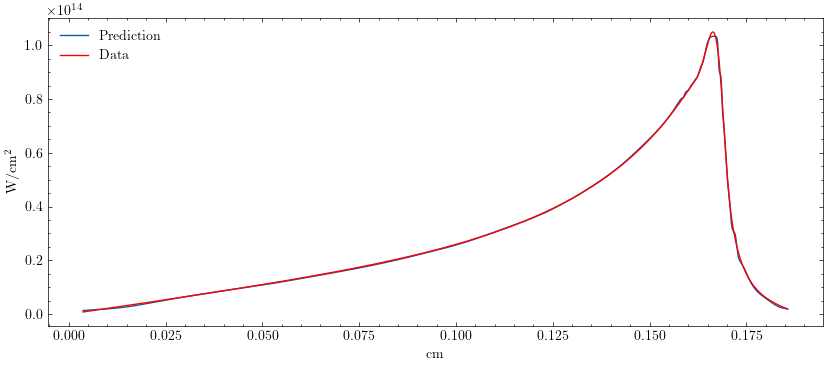

In [69]:
# And finally we can see that our network has done a decent job of estimating!
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(scaled_Qdata.index,plot_pred, label='Prediction')
ax.plot(scaled_Qdata.index,plot_actual, label='Data', color='r')
ax.set_xlabel('cm')
ax.set_ylabel('W/cm$^2$')
ax.legend()

**Gradients of predicted heat flux and initial data**

In [55]:
gradQpred=np.gradient(plot_pred, scaled_Qdata.index)
gradQact=np.gradient(plot_actual, scaled_Qdata.index)

Text(0, 0.5, 'W/cm$^3$')

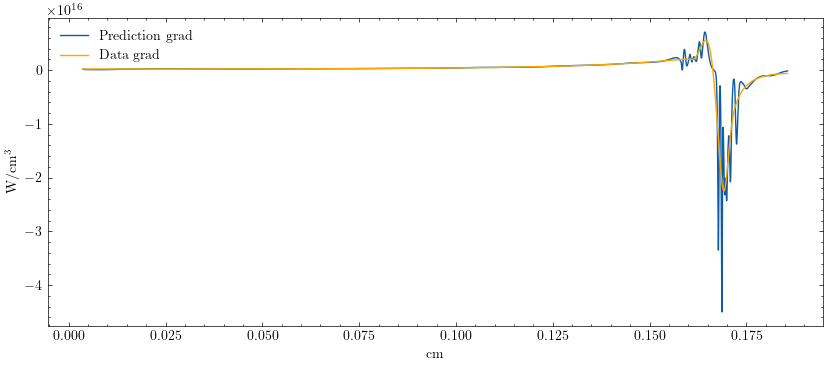

In [66]:
fig2, ax2 = plt.subplots(figsize=(10,4))
ax2.plot(scaled_Qdata.index,gradQpred, label='Prediction grad')
ax2.plot(scaled_Qdata.index,gradQact, label='Data grad', color='orange')
ax2.legend()
ax2.set_xlabel('cm')
ax2.set_ylabel('W/cm$^3$')
